<a href="https://colab.research.google.com/github/ArpitaChatterjee/StockPriceForecasting/blob/main/StockPriceForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

Steps--
1. collect the stock data of company--Apple(AAPL)
2. process the data - train and test
3. create an stacked LSTM model
4. Predict the test data and plot the output
5. Predict the future 30 days and plot the output 

In [20]:
### Data Collection
import pandas_datareader as pdr
key="1f25a20941f3480574a74c09477dedf6bc5f1990"

df = pdr.get_data_tiingo('AAPL', api_key=key) #to save the stock data till date(11-07-2021) in AAPL file

In [21]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Stock-MArket-Forecasting-master/AAPL.csv')

In [22]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stock-MArket-Forecasting-master/AAPL.csv')

In [23]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-07-12 00:00:00+00:00,97.42,97.70,97.12,97.17,24167463,22.748880,22.814264,22.678826,22.690502,96669852,0.0,1.0
1,AAPL,2016-07-13 00:00:00+00:00,96.87,97.67,96.84,97.41,25892171,22.620448,22.807258,22.613442,22.746545,103568684,0.0,1.0
2,AAPL,2016-07-14 00:00:00+00:00,98.79,98.99,97.32,97.39,38918997,23.068794,23.115496,22.725529,22.741875,155675988,0.0,1.0
3,AAPL,2016-07-15 00:00:00+00:00,98.78,99.30,98.50,98.92,30136990,23.066458,23.187885,23.001075,23.099150,120547960,0.0,1.0
4,AAPL,2016-07-18 00:00:00+00:00,99.83,100.13,98.60,98.70,36493867,23.311648,23.381702,23.024426,23.047777,145975468,0.0,1.0


In [25]:
df1=df.reset_index()['close'] #reset index to "close"
df1

0        97.42
1        96.87
2        98.79
3        98.78
4        99.83
         ...  
1253    139.96
1254    142.02
1255    144.57
1256    143.24
1257    145.11
Name: close, Length: 1258, dtype: float64

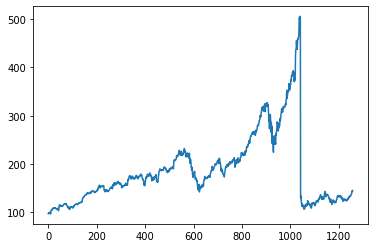

In [26]:
import matplotlib.pyplot as plt
plt.plot(df1) #close data

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [27]:
import numpy as np
df1

0        97.42
1        96.87
2        98.79
3        98.78
4        99.83
         ...  
1253    139.96
1254    142.02
1255    144.57
1256    143.24
1257    145.11
Name: close, Length: 1258, dtype: float64

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [29]:
print(df1)

[[0.00183186]
 [0.0004885 ]
 [0.00517806]
 ...
 [0.11699477]
 [0.11374628]
 [0.11831371]]


Cross Validation, RAndom Seed--> mthds work well with linear regression and classification proble

but in Timeseries data-> divide data in diff way-->(since prediction matters in the day its happening on, i.e next data is depended on previous data) -> do it serialy->train- 70% test-30

In [30]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size

train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [31]:
training_size,test_size

(817, 441)

In [34]:
train_data

array([[0.00183186],
       [0.0004885 ],
       [0.00517806],
       [0.00515363],
       [0.00771824],
       [0.00781593],
       [0.00803576],
       [0.00674124],
       [0.00486053],
       [0.00163646],
       [0.        ],
       [0.01533877],
       [0.01873382],
       [0.0184163 ],
       [0.02291046],
       [0.01907577],
       [0.02227541],
       [0.02247081],
       [0.0264032 ],
       [0.02857701],
       [0.0296517 ],
       [0.02767329],
       [0.02750232],
       [0.02811294],
       [0.03128816],
       [0.03104392],
       [0.03065312],
       [0.03031117],
       [0.03099507],
       [0.02891896],
       [0.0297494 ],
       [0.02774657],
       [0.02662303],
       [0.02508427],
       [0.02479117],
       [0.02278833],
       [0.02303258],
       [0.02457134],
       [0.02701382],
       [0.02694055],
       [0.02855259],
       [0.02161594],
       [0.01577842],
       [0.02142055],
       [0.02755117],
       [0.03688144],
       [0.04616286],
       [0.044

###Data Preprocessing

Dividing the data based on time stamps 
eg, train-120, 130, 125, 140, 134, 150             
 test-160, 190, 154
 
if timestamp =3,--> op is dependent on 3 previous features 

train->for recrd(140)

x_train          y_train

f1     f2   f3    o/p

120   130  125   140

130   125  140 134

test->

x_test  y_test

f1. f2. f3.. o/p

160 190 154 160

190 154 160 170





In [35]:
 import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [36]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100 #take 0-99 records to predict next o/p
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [38]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

Feature Scalaing

In [39]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [41]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [42]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 288ms/step - loss: 0.0132 - val_loss: 0.0402
Epoch 2/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0025 - val_loss: 0.0288
Epoch 3/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0014 - val_loss: 0.0286
Epoch 4/100
12/12 [==============================] - 2s 181ms/step - loss: 7.9585e-04 - val_loss: 0.0223
Epoch 5/100
12/12 [==============================] - 2s 184ms/step - loss: 4.9792e-04 - val_loss: 0.0206
Epoch 6/100
12/12 [==============================] - 2s 185ms/step - loss: 4.5844e-04 - val_loss: 0.0203
Epoch 7/100
12/12 [==============================] - 2s 184ms/step - loss: 4.4142e-04 - val_loss: 0.0195
Epoch 8/100
12/12 [==============================] - 2s 186ms/step - loss: 4.3594e-04 - val_loss: 0.0189
Epoch 9/100
12/12 [==============================] - 2s 182ms/step - loss: 4.1898e-04 - val_loss: 0.0184
Epoch 10/100
12/12 [==============================] - 2s 187ms/step

In [46]:
import tensorflow as tf 

In [47]:
tf.__version__

'2.5.0'

In [48]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [49]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [51]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

175.29387650467598

In [52]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

232.7098131377362

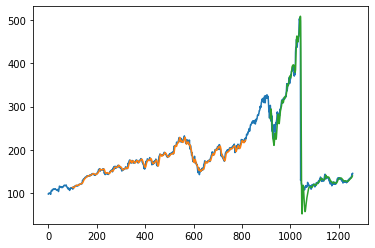

In [53]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [54]:
len(test_data)

441

In [55]:
x_input=test_data[341:].reshape(1,-1) #take the previous 100 days data and reshape it to (-1,1) as feature to predict y test
x_input.shape


(1, 100)

In [56]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist() #convert to list 

In [57]:
temp_input

[0.08345952811294027,
 0.08069952615895659,
 0.08109032289580381,
 0.07163792682331105,
 0.07129597967856965,
 0.07005031507986909,
 0.05940110400078158,
 0.060060573494211345,
 0.07600996531678961,
 0.0694885447706512,
 0.06201455717844756,
 0.05730057154022761,
 0.060451370231058565,
 0.048092423428264364,
 0.05963313956328464,
 0.056934199599433355,
 0.061770309217917985,
 0.0594988031849934,
 0.06672854281666746,
 0.07058766059303401,
 0.06860925211274488,
 0.05827756338234574,
 0.05695862439548627,
 0.06526305505349028,
 0.06318694738898933,
 0.057202872356015844,
 0.0584241121586635,
 0.05993844951394656,
 0.060378095842899715,
 0.05673880123100972,
 0.06223438034292417,
 0.06431048800742512,
 0.07139367886278153,
 0.072150847540423,
 0.0762786380733721,
 0.08228713790239855,
 0.0887230716623516,
 0.08443651995505841,
 0.09222802989595041,
 0.08636607884324166,
 0.09239900346832103,
 0.09156856040252065,
 0.09322944653412146,
 0.0890039568169606,
 0.08995652386302572,
 0.08614625

In [59]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1)) #rehsape the prediction data(1st step in LSTM)
        yhat = model.predict(x_input, verbose=0) #predict the model and get yhad value
        print(yhat[0])
        temp_input.extend(yhat[0].tolist()) #add  yhad to prev data has 100+1 data
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.06223438 0.06431049 0.07139368 0.07215085 0.07627864 0.08228714
 0.08872307 0.08443652 0.09222803 0.08636608 0.092399   0.09156856
 0.09322945 0.08900396 0.08995652 0.08614626 0.09195936 0.09293635
 0.09213033 0.09015192 0.08990767 0.08497387 0.08761174 0.07615651
 0.07676713 0.0807728  0.08192077 0.07371403 0.0714181  0.06374872
 0.06912217 0.07517952 0.0722974  0.06882908 0.06843828 0.07483758
 0.07024571 0.07432465 0.07383616 0.07371403 0.06987934 0.06824288
 0.06743686 0.069342   0.06562943 0.07136925 0.07139368 0.07344536
 0.07439793 0.0719066  0.07493527 0.08258024 0.08052855 0.08177422
 0.08577988 0.08253139 0.08702555 0.09112891 0.09044502 0.0897367
 0.08900396 0.0930829  0.09686874 0.0984075  0.09916467 0.10573494
 0.11076645 0.11699477 0.11374628 0.11831371 0.11109985 0.11332417
 0.11444401 0.11484589 0.11488875 0.11481524 0.11475955 0.11478289
 0.11490511 0.11512593 0.11543636 0.11582368 0.11627401 0.11677302
 0.11730669 0.11786184 0.11842667 0.11899114 0.1195

In [60]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [61]:
import matplotlib.pyplot as plt

In [62]:
len(df1)

1258

In [63]:
df3=df1.tolist() #dispaly as real data
df3.extend(lst_output)

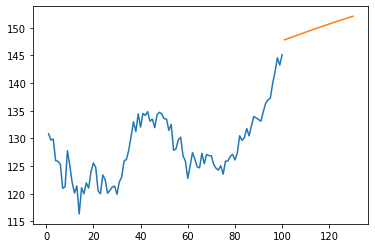

In [64]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

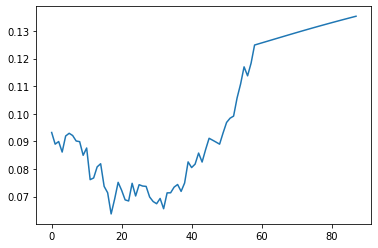

In [65]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [66]:
df3=scaler.inverse_transform(df3).tolist()

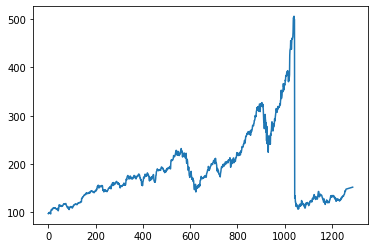

In [67]:
plt.plot(df3)